### 1. Importing all required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%matplotlib inline

#### Reading data

In [2]:
train_data=pd.read_csv('/kaggle/input/jobthon/train_s3TEQDk.csv')
test_data=pd.read_csv('/kaggle/input/jobthon/test_mSzZ8RL.csv')

### 2. Exploratory Data Analysis

In [3]:
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
train_data.dtypes #Checking datatype of each column

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [6]:
train_data.shape

(245725, 11)

In [7]:
train_data.describe() #Describing the structure of data

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [8]:
train_data['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [9]:
train_data['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [10]:
train_data['Vintage'].value_counts()

13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64

In [11]:
#To check null values in the data for each column
train_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

#### Replacing value of Categorical Data with most frequent occuring word

In [12]:
d=train_data[(train_data['Is_Lead'] == 1)]
d['Credit_Product'].value_counts().idxmax()
train_data["Credit_Product"].replace(np.nan, "Yes", inplace=True)
test_data["Credit_Product"].replace(np.nan, "Yes", inplace=True)

#### Label Encoding 
* Female - 0, Male -1
* Is_Active : Yes -1, No-0
* Credict_Product : Yes -1, No - 0 

In [13]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
train_data['Gender'] = labelencoder.fit_transform(train_data['Gender']) #Female 0
train_data['Is_Active'] = labelencoder.fit_transform(train_data['Is_Active'])#yes 1
train_data['Credit_Product'] = labelencoder.fit_transform(train_data['Credit_Product']) #Yes 1
test_data['Gender'] = labelencoder.fit_transform(test_data['Gender']) #Female 0
test_data['Is_Active'] = labelencoder.fit_transform(test_data['Is_Active'])#yes 1
test_data['Credit_Product'] = labelencoder.fit_transform(test_data['Credit_Product']) #Yes 1
train_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,1045696,0,0
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,581988,0,0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,1484315,1,0
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,470454,0,0
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,886787,0,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,1,51,RG284,Self_Employed,X3,109,1,1925586,0,0
245721,HFNB7JY8,1,27,RG268,Salaried,X1,15,0,862952,1,0
245722,GEHAUCWT,0,26,RG281,Salaried,X1,13,0,670659,0,0
245723,GE7V8SAH,0,28,RG273,Salaried,X1,31,0,407504,0,0


#### Onehot Encoding
* Self_Employeed -3,Salaried -2,Other -1,Entrepreneur -0 
* X1-4,X3-6,X2-5,X4-7

In [14]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(train_data[['Occupation','Channel_Code']]).toarray()) 
train_data = train_data.join(enc_df)
enc_df = pd.DataFrame(enc.fit_transform(test_data[['Occupation','Channel_Code']]).toarray()) 
test_data = test_data.join(enc_df)
train_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,0,1,2,3,4,5,6,7
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,1045696,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,581988,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,1484315,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,470454,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,886787,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,1,51,RG284,Self_Employed,X3,109,1,1925586,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
245721,HFNB7JY8,1,27,RG268,Salaried,X1,15,0,862952,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
245722,GEHAUCWT,0,26,RG281,Salaried,X1,13,0,670659,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
245723,GE7V8SAH,0,28,RG273,Salaried,X1,31,0,407504,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


#### Renaming columns based on new attributes

In [15]:
train_data=train_data.rename(columns = {3:'Self_Employed',1:'Other',2:'Salaried',0:'Entrepreneur',4:'X1',5:'X2',6:'X3',7:'X4'}, inplace = False)
test_data=test_data.rename(columns = {3:'Self_Employed',1:'Other',2:'Salaried',0:'Entrepreneur',4:'X1',5:'X2',6:'X3',7:'X4'}, inplace = False)
train_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Entrepreneur,Other,Salaried,Self_Employed,X1,X2,X3,X4
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,1045696,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,581988,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,1484315,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,470454,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,886787,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,1,51,RG284,Self_Employed,X3,109,1,1925586,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
245721,HFNB7JY8,1,27,RG268,Salaried,X1,15,0,862952,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
245722,GEHAUCWT,0,26,RG281,Salaried,X1,13,0,670659,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
245723,GE7V8SAH,0,28,RG273,Salaried,X1,31,0,407504,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [16]:
#Correlation between the attributes of data
train_data.corr()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Entrepreneur,Other,Salaried,Self_Employed,X1,X2,X3,X4
Gender,1.000000,0.152076,0.146380,0.077313,0.022477,0.064207,0.072068,0.017630,0.025818,-0.122439,0.085863,-0.184372,0.116018,0.080782,0.019916
Age,0.152076,1.000000,0.631242,0.246636,0.145232,0.218770,0.230814,0.028095,0.394834,-0.563227,0.152652,-0.664600,0.273153,0.456338,0.009252
Vintage,0.146380,0.631242,1.000000,0.235752,0.167433,0.209356,0.279642,0.073515,0.155663,-0.410109,0.221024,-0.571828,0.144931,0.538829,-0.162419
Credit_Product,0.077313,0.246636,0.235752,1.000000,0.070495,-0.059762,0.459025,0.124845,0.032939,-0.183908,0.113612,-0.326142,0.136911,0.204145,0.055636
Avg_Account_Balance,0.022477,0.145232,0.167433,0.070495,1.000000,0.076637,0.053370,0.035203,0.060387,-0.071691,0.003467,-0.098179,0.010163,0.106906,-0.027096
Is_Active,0.064207,0.218770,0.209356,-0.059762,0.076637,1.000000,0.085723,0.010250,0.028119,-0.207638,0.164130,-0.292109,0.159504,0.154555,0.024411
Is_Lead,0.072068,0.230814,0.279642,0.459025,0.053370,0.085723,1.000000,0.104280,0.011509,-0.117351,0.076042,-0.292903,0.131505,0.190141,0.003792
Entrepreneur,0.017630,0.028095,0.073515,0.124845,0.035203,0.010250,0.104280,1.000000,-0.066228,-0.067435,-0.087424,-0.075128,0.027859,0.053577,0.004105
Other,0.025818,0.394834,0.155663,0.032939,0.060387,0.028119,0.011509,-0.066228,1.000000,-0.407017,-0.527661,-0.104278,0.000466,0.119213,-0.014854
Salaried,-0.122439,-0.563227,-0.410109,-0.183908,-0.071691,-0.207638,-0.117351,-0.067435,-0.407017,1.000000,-0.537284,0.590747,-0.323820,-0.307399,-0.061205


### 3. Representing data

* Relationship - Gender v/s Age

<AxesSubplot:xlabel='Gender', ylabel='Age'>

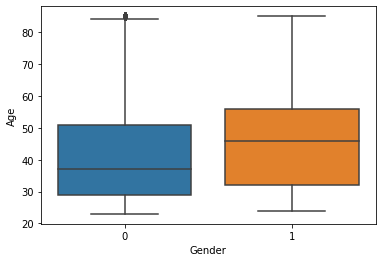

In [17]:
sns.boxplot(x = 'Gender', y = 'Age', data = train_data)

* Relationship - Gender v/s Average Balance

<AxesSubplot:xlabel='Gender', ylabel='Avg_Account_Balance'>

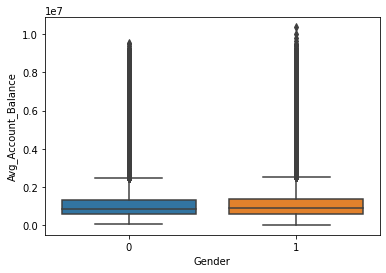

In [18]:
sns.boxplot(x = 'Gender', y = 'Avg_Account_Balance', data = train_data)

* Average Salary distribution

<AxesSubplot:>

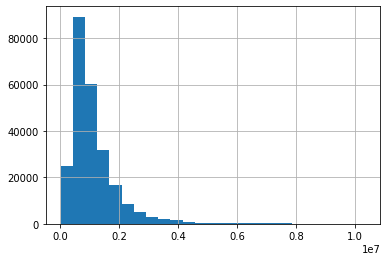

In [19]:
train_data['Avg_Account_Balance'].hist(bins=25)

<AxesSubplot:>

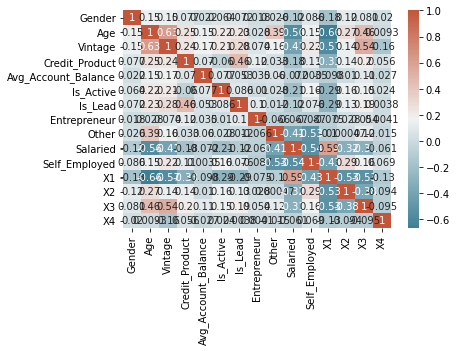

In [20]:
# calculate correlation matrix
corr = train_data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

* Relationship - Occupation v/s Average Salary

<AxesSubplot:xlabel='Occupation', ylabel='Avg_Account_Balance'>

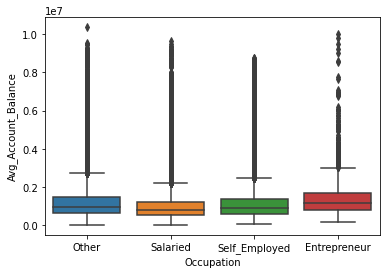

In [21]:
sns.boxplot(x = 'Occupation', y = 'Avg_Account_Balance', data = train_data)

### 4. Training Model and testing using Validatin dataset

#### Feature Selection

In [22]:
X=train_data[['Gender','Credit_Product','Vintage','Avg_Account_Balance','Is_Active','Entrepreneur','Other','Salaried','Self_Employed','X1','X2','X3','X4']]
Y=train_data[['Is_Lead']]

#### Splitting the data in train and validation dataset

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
s=[]

### 4.(a) Using Logistic Regression

In [24]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### Calculating accuracy score of the model

In [25]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
s.append(score)
print(score)

0.7626806875895299


In [26]:
logisticRegr.decision_function(x_test)

array([-1.63250057, -0.71733608, -0.59042313, ..., -0.87853452,
       -0.52031528, -0.21417951])

#### Confusin Matrix for Logistic Regression

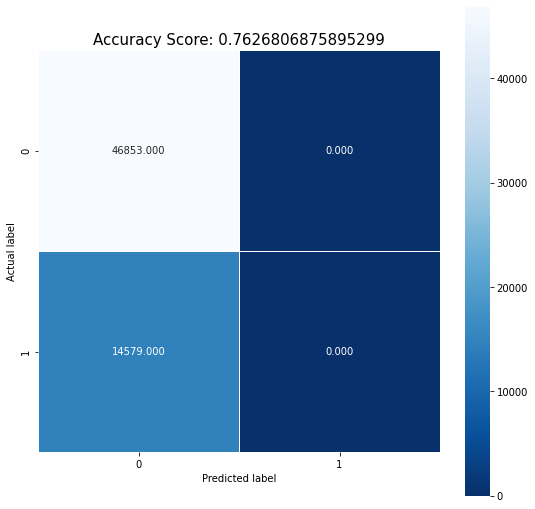

In [27]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### 4.(b) Using K-Nearest Neighbor

In [28]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### Calculating accuracy of the model

In [29]:
score = knn.score(x_test, y_test)
s.append(score)
print(score)

0.7336567261362157


#### Computes the (weighted) graph of k-Neighbors for points in X

In [30]:
A = knn.kneighbors_graph(x_train)
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### Confusion Matrix

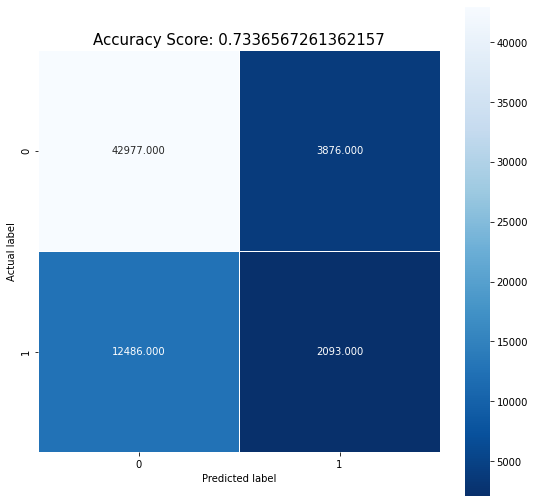

In [31]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### 4.(c) Using Support Vector Machine

In [42]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',random_state=101)
svm.fit(x_train,y_train)
y=svm.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### Calculating accuracy of the model

In [43]:
score = svm.score(x_test, y_test)
s.append(score)
print(score)

0.7626806875895299


#### Confusion Matrix

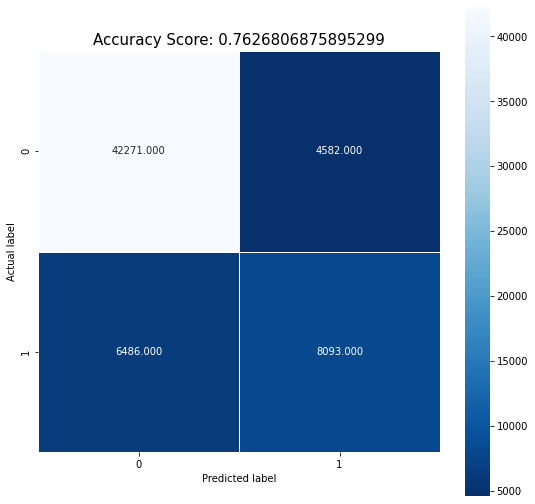

In [44]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### 4.(d) Using Decision Trees

In [47]:
clf = DecisionTreeClassifier(max_depth=10,random_state=101,criterion='entropy')
clf.fit(x_train, y_train)
y_pred =  clf.predict(x_test)

#### Calculating accuracy of the model

In [48]:
score = clf.score(x_test, y_test)
s.append(score)
print(score)

0.8199798150800885


#### Confusion Matrix

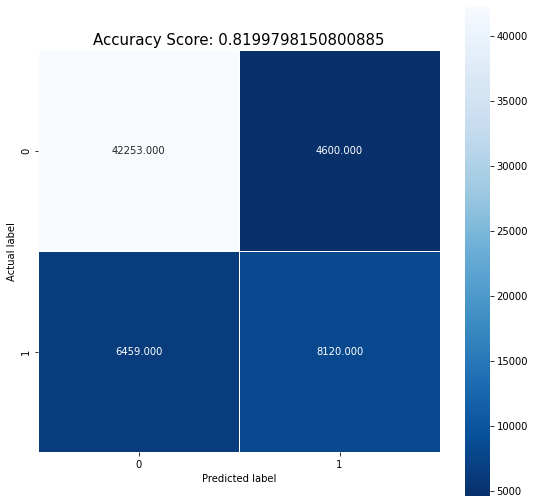

In [49]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### 4.(e) Using Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier(n_estimators=100,n_jobs=-1,max_features=None,random_state=101)
rfm.fit(x_train,y_train)
y_pred_rfm=rfm.predict(x_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


#### Calculating accuracy of the model

In [36]:
score = rfm.score(x_test, y_test)
s.append(score)
print(score)

0.7906302904023962


#### Confusion Matrix

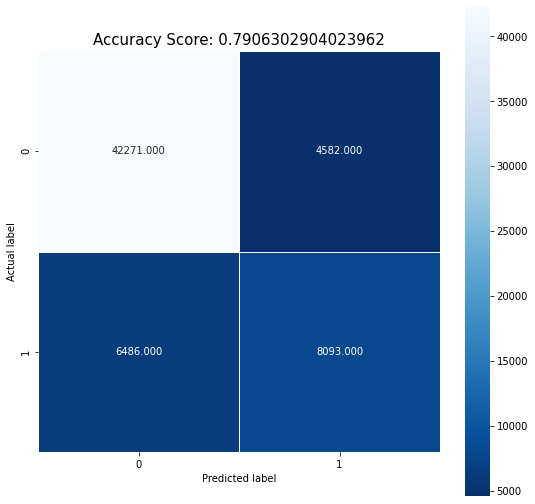

In [37]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### 5. Testing Data

In [38]:
test=test_data[['Gender','Credit_Product','Vintage','Avg_Account_Balance','Is_Active','Entrepreneur','Other','Salaried','Self_Employed','X1','X2','X3','X4']]
predict_data_dt=clf.predict(test)

In [52]:
dict={'ID':test_data['ID'], 'Is_Lead': predict_data_dt}
df = pd.DataFrame(dict)
df.to_csv('submission.csv')

### 6. Accuracy of all models

In [51]:
name=['Logistic Regression','k-NN','Decision Tree','Random Forest','SVM']
dict={'Name of Model':name, 'Accuracy Score of Model': s}
df = pd.DataFrame(dict)
df

,Name of Model,Accuracy Score of Model
0,Logistic Regression,0.762681
1,k-NN,0.733657
2,Random Forest,0.790630
3,SVM,0.762681
4,Decision Tree,0.819980
